# MNIST  WITH CNN

In this notebook, we will use a Convolutional Neural Network (CNN) to classify the MNIST dataset. This project will be divided into two parts. 

In the first part, we will build a simple CNN model using the **PyTorch** library. 

In the second part, we will use **only** the **Numpy** library to build a CNN model from scratch.

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Let's start by importing the necessary libraries.

In [10]:
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from convolutional_networks import ThreeLayerConvNet, ThreeLayerConvNet_Sig
from tqdm import tqdm

### Load Dataset

In [11]:
data_path = './data'
batch_size = 64

MNIST_data_train = datasets.MNIST(root=data_path, train=True, download=True, transform=ToTensor())
MNIST_data_test = datasets.MNIST(root=data_path, train=False, download=True, transform=ToTensor())
train_dataloader = DataLoader(MNIST_data_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(MNIST_data_test, batch_size=len(MNIST_data_test), shuffle=True)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

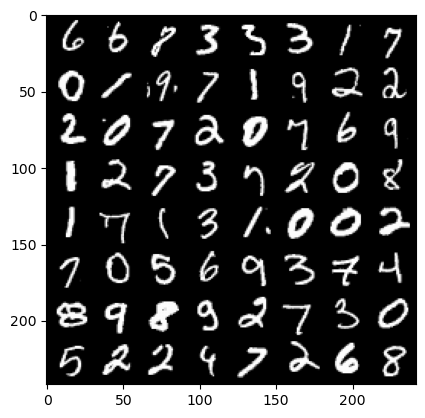

In [12]:
def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
image = images[0]
print(image.shape)

torch.Size([1, 28, 28])


## Part 1: PyTorch Implementation


In [14]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [15]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Conv_ReLU_pool_1= nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, padding=1, bias=True),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.Conv_ReLU_pool_2 = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, padding=1, bias=True),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        #self.linear = nn.Linear(784, 10)
        self.linear = nn.Linear(392, 10)
    def forward(self, x):
        x = self.Conv_ReLU_pool_1(x)
        x = self.Conv_ReLU_pool_2(x)
        x = self.flatten(x)
        logits = self.linear(x)
        return logits
    
model = MNIST_CNN()
model.train(False)

MNIST_CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Conv_ReLU_pool_1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_ReLU_pool_2): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Linear(in_features=392, out_features=10, bias=True)
)

### Define Loss Function and Optimizer

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Train

In [17]:
model.train(True)

for epoch in range(3):

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"Epoch: {epoch}, Batch: {i}, Loss: {running_loss / 100}")
            running_loss = 0.0

print("Training Finish")

model.train(False)

Epoch: 0, Batch: 99, Loss: 1.6722233998775482
Epoch: 0, Batch: 199, Loss: 0.5417394277453422
Epoch: 0, Batch: 299, Loss: 0.36961776435375215
Epoch: 0, Batch: 399, Loss: 0.3346060610562563
Epoch: 0, Batch: 499, Loss: 0.2940063178539276
Epoch: 0, Batch: 599, Loss: 0.27471289202570914
Epoch: 0, Batch: 699, Loss: 0.2649012158066034
Epoch: 0, Batch: 799, Loss: 0.23678991228342056
Epoch: 0, Batch: 899, Loss: 0.2171324460580945
Epoch: 1, Batch: 99, Loss: 0.18804381269961595
Epoch: 1, Batch: 199, Loss: 0.1733005939796567
Epoch: 1, Batch: 299, Loss: 0.1879131932556629
Epoch: 1, Batch: 399, Loss: 0.1521893886476755
Epoch: 1, Batch: 499, Loss: 0.15974155128002165
Epoch: 1, Batch: 599, Loss: 0.1509858048707247
Epoch: 1, Batch: 699, Loss: 0.14210738755762578
Epoch: 1, Batch: 799, Loss: 0.14549289904534818
Epoch: 1, Batch: 899, Loss: 0.1270344480127096
Epoch: 2, Batch: 99, Loss: 0.13006007017567753
Epoch: 2, Batch: 199, Loss: 0.11258172769099474
Epoch: 2, Batch: 299, Loss: 0.11533632213249803
Epoch:

MNIST_CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Conv_ReLU_pool_1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_ReLU_pool_2): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Linear(in_features=392, out_features=10, bias=True)
)

### Save Model

In [18]:
save_path = "./model/mnist_cnn.pth"
torch.save(model.state_dict(), save_path)

### Test

In [21]:
correct_num = 0
total_num = 0
class_num = [0 for i in range(10)]
class_correct_num = [0 for i in range(10)]
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = model(images)
        _, preds = torch.max(outputs, dim=1)
        assert preds.shape == labels.shape
        correct_num += torch.sum(preds == labels)
        total_num += data[0].shape[0]
        for i in range(10):
            class_num[i] += torch.sum(labels == i)
            class_correct_num[i] += torch.sum((preds == i) & (labels == i))


print(f"Accuracy: {(float(correct_num) / (total_num)) * 100}%")

for i in range(10):
    print(f"Accuracy of {classes[i]}: {(float(class_correct_num[i]) / (class_num[i])) * 100}%")
print(f"Total Accuracy: {(float(correct_num) / (total_num)) * 100}%")

Accuracy: 97.06%
Accuracy of 0: 98.26530456542969%
Accuracy of 1: 98.85462188720703%
Accuracy of 2: 99.031005859375%
Accuracy of 3: 96.33663940429688%
Accuracy of 4: 96.74134826660156%
Accuracy of 5: 97.86996459960938%
Accuracy of 6: 98.0167007446289%
Accuracy of 7: 96.4007797241211%
Accuracy of 8: 93.94251251220703%
Accuracy of 9: 94.94548797607422%
Total Accuracy: 97.06%



## Part 2: Numpy Implementation

**NOTE!**

* All implementations will be done from scratch using only the Numpy library and can be found in `convolutional_neural_network.py`.

* The code will be imported and used in this notebook.

### Testing

#### A. Use Naive SGD With Naive Adjustment of lr

In [22]:
model = ThreeLayerConvNet()
learning_rate = 0.1  # Adjust as needed

In [23]:
j = 0
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_dataloader), 0):  # 添加 tqdm 进度条
        j += 1
        if j > 700:
            learning_rate = 0.0001
        elif j > 500:
            learning_rate = 0.001
        elif j > 400:
            learning_rate = 0.005
        elif j > 300:
            learning_rate = 0.01
        elif j > 200:
            learning_rate = 0.03
        elif j > 100:
            learning_rate = 0.06
        inputs, labels = data
        
        # Forward and backward pass
        loss, grads = model.loss(inputs, labels)
        # Parameter updates
        for param_name in model.params:
            model.params[param_name] -= learning_rate * grads[param_name]
        
        # Print loss every 100 iterations
        if i % 100 == 0:  
            print(f"Epoch: {epoch}, Batch: {i}, Loss: {loss}")

print("Training Finish")



  0%|          | 1/938 [00:02<35:55,  2.30s/it]

Epoch: 0, Batch: 0, Loss: 2.3509485116515023


 11%|█         | 101/938 [03:53<31:42,  2.27s/it]

Epoch: 0, Batch: 100, Loss: 0.8879365045236804


 21%|██▏       | 201/938 [07:45<28:02,  2.28s/it]

Epoch: 0, Batch: 200, Loss: 0.5319013160038764


 32%|███▏      | 301/938 [11:34<24:17,  2.29s/it]

Epoch: 0, Batch: 300, Loss: 0.37063567065191944


 43%|████▎     | 401/938 [40:00<2:03:25, 13.79s/it]  

Epoch: 0, Batch: 400, Loss: 0.5593983711068938


 53%|█████▎    | 501/938 [45:53<16:43,  2.30s/it]  

Epoch: 0, Batch: 500, Loss: 0.245782866536073


 64%|██████▍   | 601/938 [49:43<12:57,  2.31s/it]

Epoch: 0, Batch: 600, Loss: 0.4594876101064243


 75%|███████▍  | 701/938 [53:32<09:02,  2.29s/it]

Epoch: 0, Batch: 700, Loss: 0.35353880431819495


 85%|████████▌ | 801/938 [57:21<05:15,  2.30s/it]

Epoch: 0, Batch: 800, Loss: 0.49589123633438664


 96%|█████████▌| 901/938 [1:01:10<01:24,  2.29s/it]

Epoch: 0, Batch: 900, Loss: 0.2762657660695384


100%|██████████| 938/938 [1:02:34<00:00,  4.00s/it]

Training Finish


In [24]:
images, labels = next(iter(test_dataloader))        # only one batch with all test data
total_num = images.shape[0]
labels = labels.numpy()
images = images.numpy()
class_num = [np.sum(labels == i) for i in range(10)]
outputs = model.loss(images)
outputs = np.argmax(outputs, axis=1)
class_correct_num = [np.sum(outputs[labels == i] == i) for i in range(10)]
correct_num = np.sum(outputs == labels)
print(f"total number {images.shape[0]},correct number {correct_num}")
total_num += data[0].shape[0]

for i in range(10):
    print(f"Accuracy of {classes[i]}: {(float(class_correct_num[i]) / (class_num[i])) * 100}%")

print(f"Total Accuracy: {(float(correct_num) / (total_num)) * 100}%")

total number 10000,correct number 8951
Accuracy of 0: 96.0204081632653%
Accuracy of 1: 97.79735682819384%
Accuracy of 2: 87.01550387596899%
Accuracy of 3: 90.0990099009901%
Accuracy of 4: 89.71486761710794%
Accuracy of 5: 80.38116591928251%
Accuracy of 6: 93.73695198329854%
Accuracy of 7: 88.03501945525292%
Accuracy of 8: 83.47022587268994%
Accuracy of 9: 87.01684836471755%
Total Accuracy: 89.22448165869218%


#### B. Use Adam Optimizer (Hand-Coded)

In [10]:
model = ThreeLayerConvNet()
learning_rate = 0.001  # Adjust as needed

In [11]:
j = 0
beta1 = 0.9
beta2 = 0.999
momentum1 = {}
momentum2 = {}
for param_name in model.params:
    momentum1[param_name] = np.zeros_like(model.params[param_name])
    momentum2[param_name] = np.zeros_like(model.params[param_name])

for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        j+=1
        if(j>600):
            learning_rate = 0.0005
        inputs, labels = data
        
        # Forward and backward pass
        loss, grads = model.loss(inputs, labels)
        # Parameter updates
        for param_name in model.params:
            momentum1[param_name] = beta1 * momentum1[param_name] + (1-beta1) * grads[param_name]
            momentum2[param_name] = beta2 * momentum2[param_name] + (1-beta2) * grads[param_name]**2
            m1 = momentum1[param_name]/(1-beta1**j)
            m2 = momentum2[param_name]/(1-beta2**j)
            model.params[param_name] -= learning_rate * (m1/(np.sqrt(m2)+1e-8))
        print(f"Epoch: {epoch}, Batch: {i}, Loss: {loss}")
        


print("Training Finish")


Epoch: 0, Batch: 0, Loss: 2.3152313640008284
Epoch: 0, Batch: 1, Loss: 2.2993177804032205
Epoch: 0, Batch: 2, Loss: 2.2934737768517355
Epoch: 0, Batch: 3, Loss: 2.286528396724189
Epoch: 0, Batch: 4, Loss: 2.311688570319312
Epoch: 0, Batch: 5, Loss: 2.2687364664956733
Epoch: 0, Batch: 6, Loss: 2.2722973735959884
Epoch: 0, Batch: 7, Loss: 2.2719422300678787
Epoch: 0, Batch: 8, Loss: 2.281301847196831
Epoch: 0, Batch: 9, Loss: 2.279594345254123
Epoch: 0, Batch: 10, Loss: 2.267953517749471
Epoch: 0, Batch: 11, Loss: 2.2644000102319093
Epoch: 0, Batch: 12, Loss: 2.275170913785588
Epoch: 0, Batch: 13, Loss: 2.229679489488456
Epoch: 0, Batch: 14, Loss: 2.2741546917233237
Epoch: 0, Batch: 15, Loss: 2.261066015404896
Epoch: 0, Batch: 16, Loss: 2.2452870577451325
Epoch: 0, Batch: 17, Loss: 2.2425938911655114
Epoch: 0, Batch: 18, Loss: 2.2345403739195726
Epoch: 0, Batch: 19, Loss: 2.242777674362061
Epoch: 0, Batch: 20, Loss: 2.233975828178145
Epoch: 0, Batch: 21, Loss: 2.1746887514216784
Epoch: 0

#### Testing

In [26]:
images, labels = next(iter(test_dataloader))        # only one batch with all test data
total_num = images.shape[0]
labels = labels.numpy()
images = images.numpy()
class_num = [np.sum(labels == i) for i in range(10)]
outputs = model.loss(images)
outputs = np.argmax(outputs, axis=1)
class_correct_num = [np.sum(outputs[labels == i] == i) for i in range(10)]
correct_num = np.sum(outputs == labels)
print(f"total number {images.shape[0]},correct number {correct_num}")
total_num += data[0].shape[0]

for i in range(10):
    print(f"Accuracy of {classes[i]}: {(float(class_correct_num[i]) / (class_num[i])) * 100}%")

print(f"Total Accuracy: {(float(correct_num) / (total_num)) * 100}%")


total number 10000,correct number 9242
Accuracy of 0: 97.95918367346938%
Accuracy of 1: 98.41409691629957%
Accuracy of 2: 87.1124031007752%
Accuracy of 3: 91.58415841584159%
Accuracy of 4: 94.90835030549898%
Accuracy of 5: 88.00448430493275%
Accuracy of 6: 95.30271398747391%
Accuracy of 7: 92.31517509727627%
Accuracy of 8: 91.58110882956879%
Accuracy of 9: 86.22398414271557%
Total Accuracy: 92.12519936204147%


#### C. Sigmoid + SGD

In [32]:
model = ThreeLayerConvNet_Sig()
learning_rate = 0.1  # Adjust as needed

In [33]:
j = 0
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_dataloader), 0):  # 添加 tqdm 进度条
        j += 1
        if j > 700:
            learning_rate = 0.0001
        elif j > 500:
            learning_rate = 0.001
        elif j > 400:
            learning_rate = 0.005
        elif j > 300:
            learning_rate = 0.01
        elif j > 200:
            learning_rate = 0.03
        elif j > 100:
            learning_rate = 0.06
        inputs, labels = data
        
        # Forward and backward pass
        loss, grads = model.loss(inputs, labels)
        # Parameter updates
        for param_name in model.params:
            model.params[param_name] -= learning_rate * grads[param_name]
        
        # Print loss every 100 iterations
        if i % 100 == 0:  
            print(f"Epoch: {epoch}, Batch: {i}, Loss: {loss}")

print("Training Finish")


  0%|          | 1/938 [00:03<47:00,  3.01s/it]

Epoch: 0, Batch: 0, Loss: 2.3171881016783953


 11%|█         | 101/938 [05:05<43:11,  3.10s/it]

Epoch: 0, Batch: 100, Loss: 2.234193742844819


 21%|██▏       | 201/938 [10:07<37:21,  3.04s/it]

Epoch: 0, Batch: 200, Loss: 1.9562120453359682


 32%|███▏      | 301/938 [15:09<31:31,  2.97s/it]

Epoch: 0, Batch: 300, Loss: 1.7870348596358088


 43%|████▎     | 401/938 [20:02<26:26,  2.95s/it]

Epoch: 0, Batch: 400, Loss: 1.7694320373900077


 53%|█████▎    | 501/938 [24:54<21:20,  2.93s/it]

Epoch: 0, Batch: 500, Loss: 1.6850643930417006


 64%|██████▍   | 601/938 [29:46<16:26,  2.93s/it]

Epoch: 0, Batch: 600, Loss: 1.6809562538166793


 75%|███████▍  | 701/938 [34:38<11:30,  2.91s/it]

Epoch: 0, Batch: 700, Loss: 1.7224714838529946


 85%|████████▌ | 801/938 [39:30<06:41,  2.93s/it]

Epoch: 0, Batch: 800, Loss: 1.7375981070503306


 96%|█████████▌| 901/938 [44:22<01:47,  2.92s/it]

Epoch: 0, Batch: 900, Loss: 1.6147940556900002


100%|██████████| 938/938 [46:08<00:00,  2.95s/it]

Training Finish


##### Test

In [34]:
images, labels = next(iter(test_dataloader))        # only one batch with all test data
total_num = images.shape[0]
labels = labels.numpy()
images = images.numpy()
class_num = [np.sum(labels == i) for i in range(10)]
outputs = model.loss(images)
outputs = np.argmax(outputs, axis=1)
class_correct_num = [np.sum(outputs[labels == i] == i) for i in range(10)]
correct_num = np.sum(outputs == labels)
print(f"total number {images.shape[0]},correct number {correct_num}")
total_num += data[0].shape[0]

for i in range(10):
    print(f"Accuracy of {classes[i]}: {(float(class_correct_num[i]) / (class_num[i])) * 100}%")

print(f"Total Accuracy: {(float(correct_num) / (total_num)) * 100}%")

total number 10000,correct number 6315
Accuracy of 0: 89.28571428571429%
Accuracy of 1: 98.85462555066078%
Accuracy of 2: 20.058139534883722%
Accuracy of 3: 69.80198019801979%
Accuracy of 4: 87.9837067209776%
Accuracy of 5: 3.1390134529147984%
Accuracy of 6: 82.6722338204593%
Accuracy of 7: 90.75875486381322%
Accuracy of 8: 35.93429158110883%
Accuracy of 9: 43.50842418235877%
Total Accuracy: 62.948564593301434%
